In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv('out.csv')
songsDF = df.pop('song')
yearsDF = df.pop('release_year')
durationDF = df.pop('duration_ms')


In [67]:
#this calculates the distance between two n-dimensional points
# a song in this case is a 13 dimensional point (13 attributes)
def calcDist(p1,p2):
    dist = 0
    for i in range(p1.size):
        dist += (p1[i]-p2[i])**2
    return dist**0.5

In [68]:
#this calculates the numerical center of all the points in a cluster
# the center calculated here is not a point, but a number
def calcNewCenter():
    newCenters = [0]*len(clusters.keys())  
    c = 0
    for cluster in clusters:
        #print(c)
        newCenters[c] = [0]*len(df.iloc[0])
        for x in range(len(newCenters[c])):
            newCenters[c][x] += df.iloc[cluster][x]/len(clusters[cluster])
        for song in clusters[cluster]:
            for x in range(len(newCenters[c])):
                newCenters[c][x] += df.iloc[song][x]/len(clusters[cluster])
                #print(index)
        c+=1
    return newCenters

In [69]:
# this calculates the point closest to the newly calculated numerical centers and returns the new center points
def calcNewCenterPoints():
    newCenterPoints = [0]*len(clusters.keys())
    c = 0
    for cluster in clusters:
        currMin = calcDist(df.iloc[cluster],newPoints[c])
        curr = cluster
        for song in clusters[cluster]:
            if calcDist(df.iloc[song],newPoints[c]) < currMin:
                currMin = calcDist(df.iloc[song],newPoints[c])
                curr = song
        newCenterPoints[c] = curr
        c+=1
    print("NEW CENTER:")
    print(newCenterPoints)
    return newCenterPoints

In [70]:
#initially choose random centers
# choose as many centers as you want clusters
centers = [1,2,3,4,5,6,7]

#if you want to skip the processing, you can plug in these cluster centers that work
#centers = [9952, 2769, 2890, 2648] 
#centers = [8589, 2520, 5511, 5556, 4382, 11140, 396]

#key: cluster center index
# value: array of all indexes that are in this cluster
clusters = {}

In [71]:
#driver code

#keepClustering is a boolean that checks if the cluster centers have changed, if not then it stops the loop
keepClustering = True
while keepClustering:
    print("CURR CENTER:")
    print(centers)
    clusters = {}
    #this part goes through and finds which center each point/song is closest to and saves it under clusters
    for (index,song) in df.iterrows():
        currMin = 100000000
        curr = 0
        for i in range(len(centers)):
            if calcDist(song,df.iloc[centers[i]]) < currMin:
                currMin = calcDist(song,df.iloc[centers[i]])
                curr = centers[i]
        if curr in clusters:
            clusters[curr].append(index)
        else:
            clusters[curr] = [index]

    #calculate the new numerical center for each cluster
    newPoints = calcNewCenter()
    #calculate the actual indices of points that are closest to the numerical center
    newCenterPoints = calcNewCenterPoints()
    #check if the new centers and the old centers are equal.
    # if they are equal then the boolean is false, and clustering is finished
    keepClustering = False
    for x in range(len(newCenterPoints)):
        if newCenterPoints[x] != centers[x]:
            keepClustering = True
            break
    #assigning the centers array the new center point indices
    centers = newCenterPoints
print("DONE! FINAL CENTERS:")
print(centers)

CURR CENTER:
[1, 2, 3, 4, 5, 6, 7]
NEW CENTER:
[4320, 4203, 12418, 6420, 9903, 8366, 8197]
CURR CENTER:
[4320, 4203, 12418, 6420, 9903, 8366, 8197]
NEW CENTER:
[11722, 9303, 14781, 4833, 9903, 1452, 8631]
CURR CENTER:
[11722, 9303, 14781, 4833, 9903, 1452, 8631]
NEW CENTER:
[6611, 2769, 1879, 9903, 13735, 2700, 12281]
CURR CENTER:
[6611, 2769, 1879, 9903, 13735, 2700, 12281]
NEW CENTER:
[11881, 2769, 4109, 13735, 2700, 9903, 10695]
CURR CENTER:
[11881, 2769, 4109, 13735, 2700, 9903, 10695]
NEW CENTER:
[11881, 993, 12711, 13735, 2700, 5268, 9903]
CURR CENTER:
[11881, 993, 12711, 13735, 2700, 5268, 9903]
NEW CENTER:
[11881, 10179, 7152, 9903, 4833, 2700, 1802]
CURR CENTER:
[11881, 10179, 7152, 9903, 4833, 2700, 1802]
NEW CENTER:
[11881, 3206, 3975, 4833, 9903, 2700, 12307]
CURR CENTER:
[11881, 3206, 3975, 4833, 9903, 2700, 12307]
NEW CENTER:
[11881, 6423, 4422, 4833, 3016, 2700, 1532]
CURR CENTER:
[11881, 6423, 4422, 4833, 3016, 2700, 1532]
NEW CENTER:
[11881, 13160, 8210, 4833, 3932, 27

<AxesSubplot:title={'center':'H0'}>

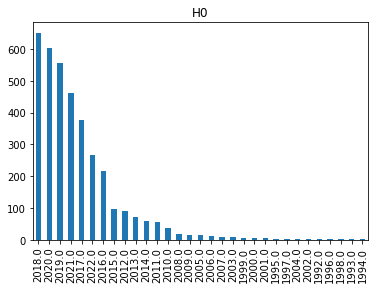

In [72]:
# For each cluster, create a dataframe of songs in that cluster
# then for that dataframe, plot the number of songs under each year
df['release_year'] = yearsDF
x = []
for cluster in clusters:
    temp = []
    temp.append(df.iloc[cluster])
    for songIndex in clusters[cluster]:
        temp.append(df.iloc[songIndex])
    x.append(pd.DataFrame(temp))

x[0]['release_year'].value_counts().plot(kind='bar',title=str("H0"))

<AxesSubplot:title={'center':'H1'}>

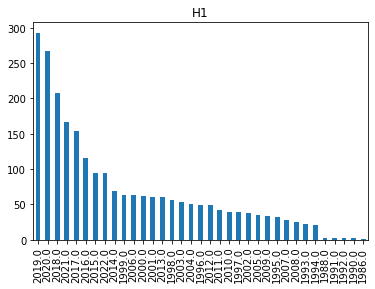

In [73]:
x[1]['release_year'].value_counts().plot(kind='bar',title=str("H1"))

<AxesSubplot:title={'center':'H2'}>

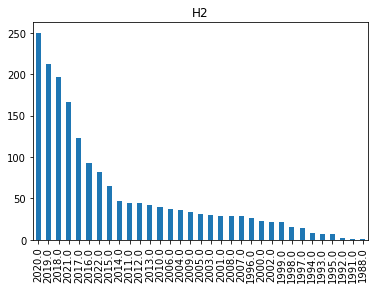

In [74]:
x[2]['release_year'].value_counts().plot(kind='bar',title=str("H2"))

<AxesSubplot:title={'center':'H3'}>

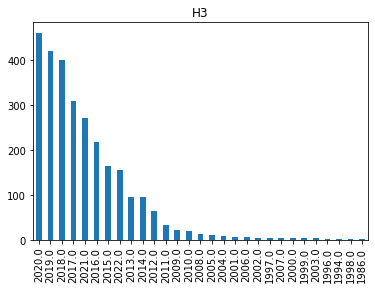

In [75]:
x[3]['release_year'].value_counts().plot(kind='bar',title=str("H3"))

<AxesSubplot:title={'center':'H3'}>

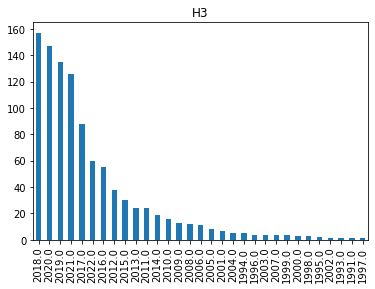

In [76]:
x[4]['release_year'].value_counts().plot(kind='bar',title=str("H3"))

<AxesSubplot:title={'center':'H3'}>

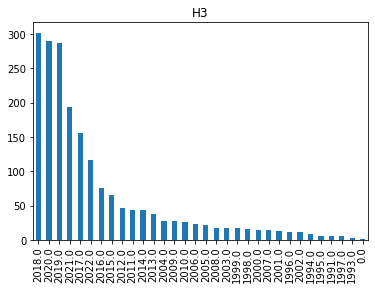

In [77]:
x[5]['release_year'].value_counts().plot(kind='bar',title=str("H3"))

<AxesSubplot:title={'center':'H3'}>

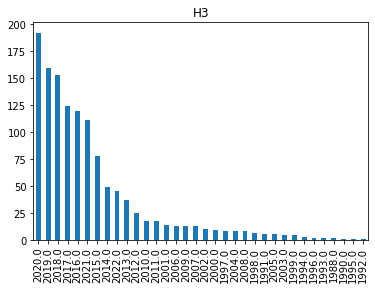

In [78]:
x[6]['release_year'].value_counts().plot(kind='bar',title=str("H3"))